In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import os
import cv2
import PIL.Image as Image

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## **Make predictions using ready made model (without any training)**

In [6]:
Image_Shape = (224, 224)

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
classifier = Sequential()
classifier.add(base_model)

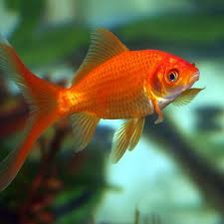

In [14]:

gold_fish = Image.open("/content/images.jpeg").resize(Image_Shape)
gold_fish

In [15]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [16]:
gold_fish[np.newaxis, ...]

array([[[[0.3372549 , 0.5372549 , 0.37647059],
         [0.32156863, 0.52156863, 0.36078431],
         [0.29803922, 0.49803922, 0.3372549 ],
         ...,
         [0.16078431, 0.29019608, 0.21568627],
         [0.15686275, 0.29411765, 0.20784314],
         [0.15686275, 0.29803922, 0.19607843]],

        [[0.34117647, 0.54117647, 0.38039216],
         [0.3254902 , 0.5254902 , 0.36470588],
         [0.30196078, 0.50196078, 0.34117647],
         ...,
         [0.15686275, 0.28627451, 0.21960784],
         [0.15686275, 0.28627451, 0.20392157],
         [0.15294118, 0.29019608, 0.19607843]],

        [[0.34509804, 0.54117647, 0.39215686],
         [0.33333333, 0.52941176, 0.38039216],
         [0.30588235, 0.50588235, 0.34509804],
         ...,
         [0.15294118, 0.27843137, 0.21960784],
         [0.15294118, 0.28235294, 0.20784314],
         [0.14901961, 0.28627451, 0.2       ]],

        ...,

        [[0.04705882, 0.04313725, 0.03529412],
         [0.04705882, 0.04313725, 0.03529412]

In [17]:

result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 7, 7, 1280)

In [18]:
np.argmax(result)

2611

In [31]:
index = np.argmax(result)

In [32]:
print(f"Predicted class: {class_labels[index]}")

IndexError: list index out of range

In [20]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=Image_Shape+(3,))
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7a0970173c90> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [21]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Build your model
classifier = Sequential([
    base_model,
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Example output layer
])

classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7, 7, 128)           │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7, 7, 10)            │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,389,130 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [28]:
# Load and preprocess the image
image_path = "/content/Vombatus_ursinus_-Maria_Island_National_Park.jpg"  # Replace with your image path
image_size = (224, 224)  # Resize to model's input size

# Load the image and convert to array
img = load_img(image_path, target_size=(224, 224))  # Resize image
img_array = img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
predictions = classifier.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability

print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class index: 114


In [29]:
import requests

url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
class_labels = requests.get(url).json()

# Print the predicted class name
print(f"Predicted class: {class_labels[predicted_class]}")

Predicted class: slug
